本章では想像力をサポートして将来予測を行うための手法、**数値シュミレーション**を学習する。消費者行動が口コミなどの情報伝播によりどのように変化していくかを分析する、人間関係のネットワーク構造を用いた数値シュミレーション手法を中心に学ぶ。

### ■データ一覧
1. **links.csv**：リピーター20人のSNSでのつながり
1. **links_members.csv**：リピーター540人のSNSでのつながり
1. **info_members.csv**：リピーター540人の月々の利用状況

## ノック71：人間関係のネットワークを可視化してみよう

In [1]:
import pandas as pd

df_links = pd.read_csv('links.csv')
df_links.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node10,Node11,Node12,Node13,Node14,Node15,Node16,Node17,Node18,Node19
0,Node0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Node2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Node4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# グラフオブジェクトの作成
G = nx.Graph()

# 頂点の設定
NUM = len(df_links.index)
for i in range(1,NUM+1):
    node_no = df_links.columns[i].strip('Node')
    #print(node_no)
    G.add_node(str(node_no))
    
# 辺の設定
for i in range(NUM):
    for j in range(NUM):
        # print(i,j)
        if df_links.iloc[i][j]==1:
            G.add_edge(str(i),str(j))

# 描画
nx.draw_networkx(G,node_color='k',edge_color='k',font_color='w')
plt.show()

## ノック72：口コミによる情報伝播の様子を可視化してみよう
「10のつながりのうち、10%の確率で口コミが伝播する」と仮定し、口コミの様子をシュミレーションする。

In [3]:
import numpy as np

In [4]:
def determin_link(percent):
    rand_val = np.random.rand()
    if rand_val<=percent:
        return 1
    else:
        return 0

In [5]:
def simulate_percolation(num,list_active,percent_percolation):
    for i in range(num):
        if list_active[i] == 1:
            for j in range(num):
                if df_links.iloc[i][j]==1:
                    if determin_link(percent_percolation)==1:
                        list_active[j]=1
    return list_active

In [6]:
percent_percolation = 0.07
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_percolation(NUM,list_active,percent_percolation)
    list_timeSeries.append(list_active.copy())

In [7]:
def active_node_coloring(list_active):
    # print(list_timeSeries[t])
    list_color = []
    for i in range(len(list_timeSeries[t])):
        if list_timeSeries[t][i]==1:
            list_color.append('r')
        else:
            list_color.append('k')
    
    print(len(list_color))
    return list_color

20


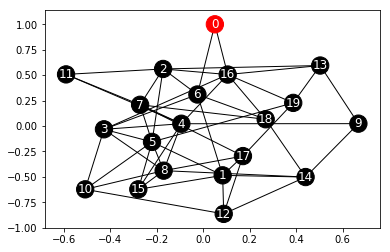

In [8]:
t = (10)
nx.draw_networkx(G,font_color='w',node_color=active_node_coloring(list_timeSeries[t]))
plt.show()

0ヶ月
20


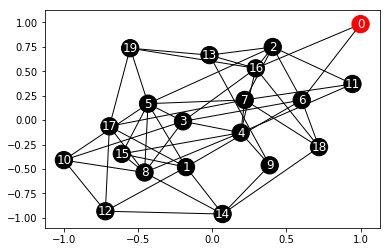

12ヶ月
20


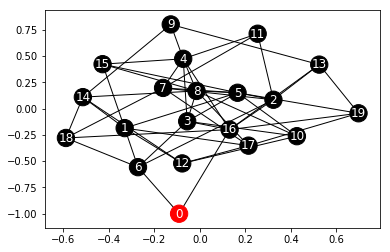

24ヶ月
20


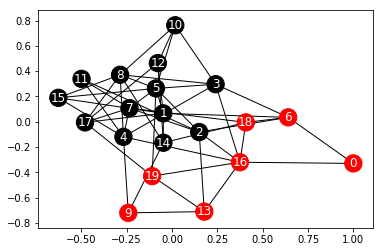

36ヶ月
20


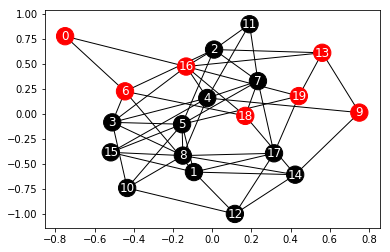

In [9]:
for t in range(0,37,12):
    print(str(t)+'ヶ月')
    nx.draw_networkx(G,font_color='w',node_color=active_node_coloring(list_timeSeries[t]))
    plt.show()

## ノック73：口コミ数の時系列変化をグラフ化してみよう
口コミ数の時系列表示を作ってみよう。

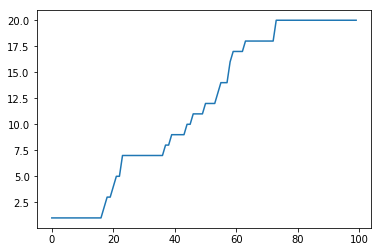

In [10]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))
    
plt.plot(list_timeSeries_num)
plt.show()

In [12]:
list_active

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

## ノック74：会員数の字形列変化をシュミレーションしてみよう
口コミによってスポーツジムの利用状況がどのように変化していくかをシュミレーションしてみる。

In [16]:
def simulate_population(num,list_active,percent_percolation,percent_disapparence,df_links):
    # 拡散
    for i in range(num):
        if list_active[i]==1:
            for j in range(num):
                if df_links.iloc[i][j]==1:
                    if determin_link(percent_percolation)==1:
                        list_active[j]=1
                        
    # 消滅
    for i in range(num):
        if determin_link(percent_disapparence)==1:
            list_active[i] = 0
    return list_active

In [17]:
percent_percolation = 0.1
percent_disapparence = 0.05
T_NUM = 100
NUM = len(df_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1

list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM,list_active,percent_percolation,percent_disapparence,df_links)
    list_timeSeries.append(list_active.copy())

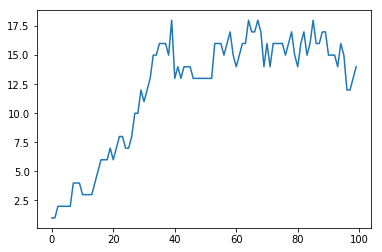

In [18]:
# 時系列グラフを描く
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))
    
plt.plot(list_timeSeries_num)
plt.show()

口コミの伝播を10%、退会確率を5%とするとグラフは増減を繰り返しながらも100%に向かっていることがわかる。一方退会の確率をある程度増やすと、利用者がいなくなる様子を確認することができる。

In [44]:
percent_disapparence = 0.125
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for i in range(T_NUM):
    list_active = simulate_population(NUM,list_active,percent_percolation,percent_disapparence,df_links)
    list_timeSeries.append(list_active.copy())

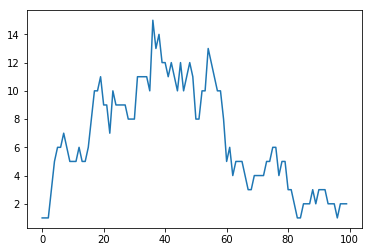

In [45]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))
    
plt.plot(list_timeSeries_num)
plt.show()

## ノック75：パラメータの全体像を、「相図」を見ながら把握しよう
口コミの伝播と利用の中断の確率が、商品の普及にどう影響するか(長い目で見て定着するか、それとも忘れられかはかなり重要である。**「相図」**そうした普及の様子を確認できる。

In [59]:
T_NUM = 100
NUM_PhaseDiagram = 20
phaseDiagram = np.zeros((NUM_PhaseDiagram,NUM_PhaseDiagram))

for i_p in range(NUM_PhaseDiagram):
    for i_d in range(NUM_PhaseDiagram):
        percent_percolation = 0.05*i_p
        percent_disapparence = 0.05*i_d
        list_active = np.zeros(NUM)
        list_active[0] = 1
        for t in range(T_NUM):
            list_active = simulate_population(NUM,list_active,percent_percolation,percent_disapparence,df_links)
        phaseDiagram[i_p][i_d] = sum(list_active)

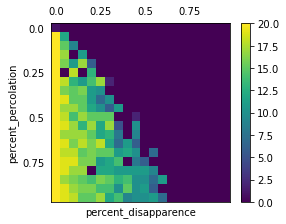

In [64]:
plt.matshow(phaseDiagram)
plt.colorbar(shrink=0.8)
plt.xlabel('percent_disapparence')
plt.ylabel('percent_percolation')
plt.xticks(np.arange(0.0, 20.0, 5),np.arange(0.0, 1.0, 0.25))
plt.yticks(np.arange(0.0, 20.0, 5),np.arange(0.0, 1.0, 0.25))
plt.tick_params(bottom=False,left=False,right=False,top=False)
plt.show()

## ノック76：実データを読み込んでみよう

In [66]:
df_mem_links = pd.read_csv('links_members.csv')
df_mem_info = pd.read_csv('info_members.csv')
df_mem_links.head()

,Unnamed: 0,Node0,Node1,Node2,Node3,Node4,Node5,Node6,Node7,Node8,...,Node530,Node531,Node532,Node533,Node534,Node535,Node536,Node537,Node538,Node539
0,Node0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Node2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,Node3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Node4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [67]:
df_mem_info.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Node0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,Node1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,Node2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
3,Node3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
4,Node4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## ノック77：リンク数の分布を可視化しよう
ネットワークを可視化するのが王道だが、人数が多いとノードが密集してうまく状況がつかめない。ネットワーク構造にはわずかなステップで全員がつながる「スモールワールド型」や、少数のつながりを極めて多くもつ人がハブになる「スケールフリー型」がある。
どんな構造をしているかはリンク数の分布を可視化してみると、ある程度把握できる。

In [83]:
NUM = len(df_mem_links.index)
array_linkNum = np.zeros(NUM)
for i in range(NUM):
    array_linkNum[i] = sum(df_mem_links['Node'+str(i)])
print(array_linkNum.mean())

103.48148148148148


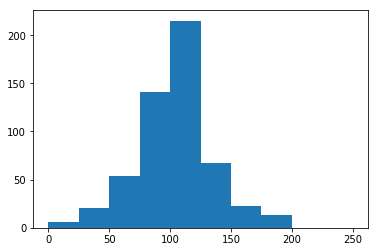

In [76]:
plt.hist(array_linkNum,bins=10,range=(0,250))
plt.show()

ヒストグラムの表をみるとおよそリンク数が100程度に集まっており、正規分布に近い形になっていることがわかる。スモールワールド型やスケールフリー型だとこの分布が「べき分布」に近いものになる。
この分布はどのノードもある程度のリンク数をもっているため「急激に口コミが広がることもいえない」代わりに「ハブなどに頼らなくても口コミが広がりやすい」といえる。。逆にスケールフリー型だと、リンクを多くもつハブが機能しないと口コミが広がらない特徴がある。

## ノック78：シュミレーションのために実データからパラメータを推定しよう
このデータを使ってシュミレーションしてみる。今回のモデルで重要なパラメータは、口コミが伝播する確率「percent_percolation」と、消滅する確率「percent_disappacence」である。

In [111]:
NUM = len(df_mem_info.index)
T_NUM = len(df_mem_info.columns)-1

# 消滅の確率推定
count_active = 0
count_active_to_inactive =0
for t in range(1,T_NUM):
    for i in range(NUM):
        if (df_mem_info.iloc[i][t]==1):
            count_active_to_inactive += 1
            if (df_mem_info.iloc[i][t+1]==0):
                count_active += 1
estimated_percent_disapparence = count_active/count_active_to_inactive

In [113]:
# 拡散の確率
count_link = 0
count_link_to_active =0
count_link_temp = 0
for t in range(T_NUM-1):
    df_link_t = df_mem_info[df_mem_info[str(t)]==1]
    temp_flag_count = np.zeros(NUM)
    
    for i in range(len(df_link_t.index)):
        df_link_temp = df_mem_links[df_mem_links['Node'+str(df_link_t.index[i])]==1]
        
        for j in range(len(df_link_temp.index)):
            if(df_mem_info.iloc[df_link_temp.index[j]][t]==0):
                if (temp_flag_count[df_link_temp.index[j]]==0):
                    count_link += 1
                    
                if(df_mem_info.iloc[df_link_temp.index[j]][t+1]==1):
                    if(temp_flag_count[df_link_temp.index[j]]==0):
                        temp_flag_count[df_link_temp.index[j]]=1
                        count_link_to_active += 1

estimated_percent_percolation = count_link_to_active/count_link

## ノック79：実データとシュミレーションを比較しよう

In [115]:
persent_percolation = estimated_percent_percolation
percent_disapparence = estimated_percent_disapparence
T_NUM = 24
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM,list_active,persent_percolation,percent_disapparence,df_mem_links)
    list_timeSeries.append(list_active.copy())

In [117]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

In [120]:
T_NUM = len(df_mem_info.columns)-1
list_timeSeries_num_real = []
for t in range(0,T_NUM):
    list_timeSeries_num_real.append(len(df_mem_info[df_mem_info[str(t)]==1].index))

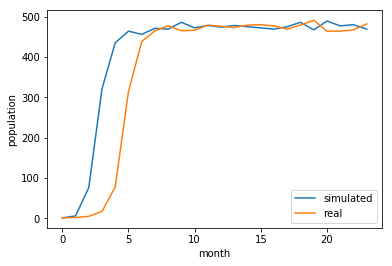

In [121]:
plt.plot(list_timeSeries_num,label='simulated')
plt.plot(list_timeSeries_num_real,label='real')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='best')
plt.show()

## ノック80：シュミレーションによる将来予測を実施しよう
今回のシュミレータの継続時間を36か月に延長し、将来予測を実施してみる。

In [122]:
persent_percolation = estimated_percent_percolation
percent_disapparence = estimated_percent_disapparence
T_NUM = 36
NUM = len(df_mem_links.index)
list_active = np.zeros(NUM)
list_active[0] = 1
list_timeSeries = []
for t in range(T_NUM):
    list_active = simulate_population(NUM,list_active,persent_percolation,percent_disapparence,df_mem_links)
    list_timeSeries.append(list_active.copy())

In [124]:
list_timeSeries_num = []
for i in range(len(list_timeSeries)):
    list_timeSeries_num.append(sum(list_timeSeries[i]))

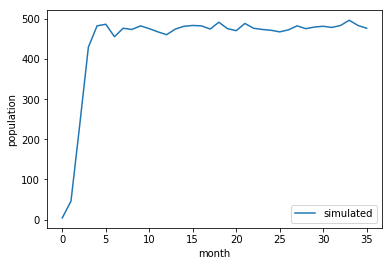

In [125]:
plt.plot(list_timeSeries_num,label='simulated')
plt.xlabel('month')
plt.ylabel('population')
plt.legend(loc='best')
plt.show()

結果を見ると、24か月目までの傾向がそのまま続いており、立下りなどが起こらない様子が確認できる。